In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
df=pd.read_csv("/content/drive/My Drive/UNSW_NB15_training-set.csv")
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [5]:
df_test=pd.read_csv("/content/drive/My Drive/UNSW_NB15_testing-set.csv")
df_test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


# Features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

# Distribution of normall transactions vs attacks



In [6]:
df['label'].value_counts()

1    119341
0     56000
Name: label, dtype: int64

# Distribution for type of attack 

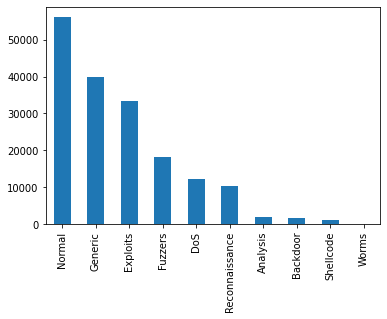

In [7]:
plt.xticks(rotation='vertical')
df['attack_cat'].value_counts().plot(kind='bar')

# Correlation

In [8]:
df.corr()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
id,1.000000,0.006587,-0.068827,-0.126316,0.001104,-0.080283,0.364575,0.615508,-0.049604,0.143649,-0.356902,-0.018451,-0.099755,0.027197,-0.027327,-0.019626,-0.081799,-0.416529,-0.326110,-0.326044,-0.412318,0.001216,-0.004703,0.007422,-0.083356,-0.361818,-0.019404,-0.020558,0.478979,0.617467,0.467591,0.536544,0.601158,0.539093,-0.037636,-0.037636,-0.028287,0.425396,0.480899,0.033142,0.727173
dur,0.006587,1.000000,0.254559,0.181182,0.199731,0.144134,-0.120966,0.012196,0.044159,-0.081749,-0.050603,0.198597,0.142963,0.080055,0.152142,0.144413,0.157443,0.022047,0.013183,0.014724,0.017527,0.053125,0.051093,0.049332,0.090028,0.025336,0.002071,0.078915,-0.113709,0.186293,-0.086300,-0.094091,-0.093923,-0.101760,0.020641,0.020641,0.024743,-0.080871,-0.115336,0.035370,0.036175
spkts,-0.068827,0.254559,1.000000,0.390067,0.963791,0.206609,-0.076358,-0.102723,0.068246,-0.051646,0.075897,0.971069,0.207798,-0.017587,-0.001678,-0.000384,0.017096,0.131813,0.107410,0.102161,0.133102,0.039187,0.035507,0.038725,0.216592,0.150237,0.008834,0.087217,-0.069127,-0.086170,-0.060194,-0.068373,-0.072484,-0.077553,0.009951,0.009951,0.006084,-0.061584,-0.069598,-0.017770,-0.052178
dpkts,-0.126316,0.181182,0.390067,1.000000,0.188476,0.971907,-0.098202,-0.192580,0.053861,-0.066710,0.139145,0.204883,0.978636,-0.022160,-0.006514,0.000229,0.054371,0.183703,0.144119,0.142667,0.185555,0.020915,0.015936,0.023899,0.014697,0.441445,0.029042,0.442194,-0.079095,-0.150023,-0.071909,-0.086695,-0.094267,-0.094085,0.013491,0.013491,0.047974,-0.075190,-0.078342,-0.021765,-0.118591
sbytes,0.001104,0.199731,0.963791,0.188476,1.000000,0.009926,-0.028468,-0.020860,0.063009,-0.018322,-0.007829,0.996109,0.006804,-0.006565,0.000024,-0.002054,-0.003516,0.050450,0.043164,0.037988,0.050981,0.043624,0.039739,0.042883,0.232348,-0.004973,0.003428,0.001620,-0.034395,-0.012053,-0.026661,-0.026490,-0.027281,-0.032061,-0.004515,-0.004515,-0.002185,-0.027479,-0.034553,-0.006367,0.018576
dbytes,-0.080283,0.144134,0.206609,0.971907,0.009926,1.000000,-0.059475,-0.135515,0.023559,-0.040430,0.104757,0.017366,0.996504,-0.013618,-0.007701,-0.002422,0.047354,0.113148,0.086894,0.086453,0.114269,0.003907,0.000101,0.007546,-0.036635,0.419965,0.030912,0.470905,-0.045529,-0.089944,-0.042633,-0.052135,-0.056901,-0.054633,-0.010460,-0.010460,0.051403,-0.045594,-0.044531,-0.013147,-0.076871
rate,0.364575,-0.120966,-0.076358,-0.098202,-0.028468,-0.059475,1.000000,0.407572,-0.414546,0.602492,-0.153051,-0.042923,-0.075259,-0.075745,-0.051539,-0.063370,-0.085802,-0.515681,-0.408750,-0.409046,-0.518117,-0.300794,-0.279271,-0.290051,-0.113232,-0.273323,-0.078556,-0.022752,0.357704,0.431534,0.317229,0.353589,0.390721,0.383094,-0.068140,-0.068140,-0.109297,0.310876,0.362883,-0.072948,0.337979
sttl,0.615508,0.012196,-0.102723,-0.192580,-0.020860,-0.135515,0.407572,1.000000,-0.032823,0.276475,-0.397431,-0.044667,-0.162628,-0.206571,-0.003215,0.022676,-0.123435,-0.416843,-0.337305,-0.334114,-0.424320,0.039777,0.042590,0.032293,-0.010029,-0.550389,-0.063904,-0.050454,0.346079,0.672325,0.271383,0.344104,0.379930,0.404346,-0.124157,-0.124157,-0.112833,0.273252,0.340678,-0.220429,0.692741
dttl,-0.049604,0.044159,0.068246,0.053861,0.063009,0.023559,-0.414546,-0.032823,1.000000,-0.280427,-0.116421,0.075166,0.035476,-0.081896,0.097999,0.147401,0.101262,0.746247,0.592789,0.596770,0.754018,0.807341,0.747000,0.781261,0.194367,0.140184,0.152450,0.016425,-0.417338,-0.262362,-0.381678,-0.366308,-0.389429,-0.403465,0.107208,0.107208,0.223652,-0.365404,-0.431188,-0.091137,0.095049
sload,0.143649,-0.081749,-0.051646,-0.066710,-0.018322,-0.040430,0.602492,0.276475,-0.280427,1.000000,-0.1062

# Correlation Heatmap

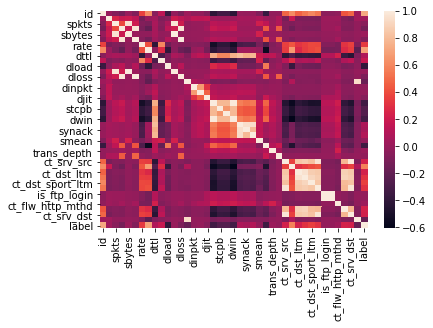

In [9]:
sns.heatmap(df.corr())